**3.23)** A grenade is thrown with the initial velocity $\vec v_0$ from the origin at the top of a high cliff, subject to negligible air resistance. 


**(a)** Using a suitable plotting program, plot the orbit, with the following parameters: $\vec v_0 = (4,4)$, $g=1$, and $0 \leq t \leq 4$ (and with $x$ measured horizontally and y vertically up). Add to your plot suitable marks (dots or crosses, for example) to show the positions of the grenade at $t=1,2,3,4$.

**(b)** At $t=4$, when the grenade's velocity is $\vec v$, it explodes into two equal pieces, one of which moves off with velocity $\vec v + \Delta \vec v$. What is the velocity of the other piece?

**(c)** Assuming that $\Delta \vec v = (1,3)$, add to your original plot the paths of the two pieces for $4 \leq t \leq 9$. Insert marks to show their positions at $t=5,6,7,8,9$. Find some way to show clearly that the CM of the two pieces continues to follow the original parabolic path.

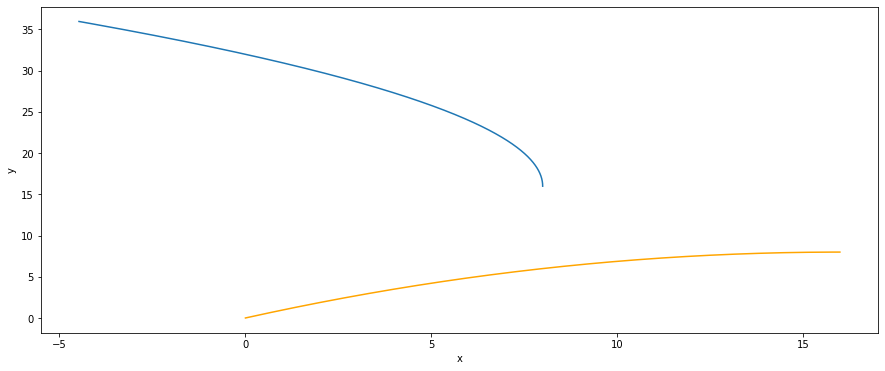

In [116]:
import numpy as np
import matplotlib.pyplot as plt

v_0 = [4,4]
g = 1
ta = np.linspace(0,4,1000)
r0 = [0,0]
time = 4


#part a
def motion(r0,v0,g,t0,tf):      
    vx = []                
    vy = []
    x = []                
    y = []
    xs = []
    ys = []
    xp = r0[0]
    yp = r0[1]
    vxp = v0[0]
    vyp = v0[1]
    dt = (tf-t0)/1000
    while t0 < tf:         
        x.append(xp)
        y.append(yp)
        vx.append(vxp)
        vy.append(vyp)
        vxp = vxp 
        vyp = vyp - g*dt                     
        xp = xp + vxp*dt
        yp = yp + vyp*dt
        t0 += dt
#     r = 
#     v = 
    sec = [xs,ys]
    return [x,y],[vx,vy]

[rf,v] = motion(r0,v_0,g,0,4)
v_ex = [v[0][-1],v[1][-1]]
r_ex = [rf[0][-1],rf[1][-1]]
# print(v_ex)
dv = [1,3]
v1 = [v_ex[0]+dv[0],v_ex[1]+dv[1]]
v2 = [v_ex[0]-dv[0],v_ex[1]-dv[1]]

[s1,v1] = motion(r_ex,v_ex,g,4,9)

#Graph
plt.figure(1,figsize=(15,6))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(rf[0],rf[1],'-',color='orange',label="overall path")
# plt.plot(pts[1],pts[0],'ro',markersize=10,label="@ t=1,2,3,4 (part a)")
# plt.plot(rs[0],rs[1],'ro',markersize=10,label="@ t=1,2,3,4 (part a)")
plt.plot(s1[1],s1[0],label="Piece1")
# plt.plot(s2[1],s2[0],label="Piece2")
# plt.plot(CM[1],CM[0],'c--',label="CM")
# plt.legend()
# plt.show()



In [68]:
# def motion(v_0,g,dt,r0):
#     v = [v_0,v_0]
#     xf = r0[0]+(v[0]*dt)
#     yf = r0[1]+(v[1]*t)+(g*(t**2)/2)
#     return [xf,yf]

# rf= motion(v_0,g,ta,r0)
# tpt = np.arange(0,5,1)
# pts = motion(v_0,g,tpt,r0)

# #part c
# dv = [1,3]
# def vel(v_0,g,t):
#     vx = v_0[0]
#     vy = v_0[1]-g*t
#     return [vx,vy]

# v_ex = vel(v_0,g,4)
# v1 = [v_ex[0]+dv[0],v_ex[1]+dv[1]]
# v2 = [v_ex[0]-dv[0],v_ex[1]-dv[1]]


# tc = np.linspace(4,9,1000)
# tcpt = np.arange(4,10,1)

# r_ex = motion(v_0,g,4,r0)

# s1 = motion(v1,g,tc,r_ex)
# s2 = motion(v2,g,tc,r_ex)


# CM = motion(v_0,g,tc,r0)
# # v = explode(v_0,g,tc,dv)
# # print(v)


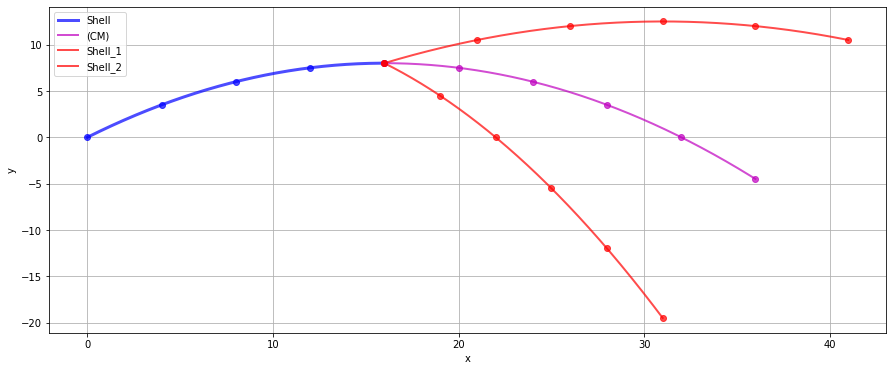

In [120]:
#Let's simulate first four seconds
m=1.
deltavx=1.;deltavy=3. #delta v for the shells
g=1.
N=40000 #number of time increments to simulate
dt=0.0001
vx=4. #speed of ball
vy=4.

x=0.# position with drag
y=0.

x1=[]
y1=[]

for i in range(1,N):
    x1.append(x)
    y1.append(y)
    x =x+vx*dt
    y=y+vy*dt
    vy=vy-g*dt

#Now we have to simulate CM, and two shells:
xs1=[];xs2=[];ys1=[];ys2=[];xcm1=[];ycm1=[]
s1x=x;s2x=x;s1y=y;s2y=y;cmx=x;cmy=y
cmvx=vx;cmvy=vy; s1vx=vx+deltavx; s1vy=vy+deltavy; s2vx=vx-deltavx; s2vy=vy-deltavy
N=50000
for i in range(1,N):
    xs1.append(s1x)
    ys1.append(s1y)
    xs2.append(s2x)
    ys2.append(s2y)
    xcm1.append(cmx)
    ycm1.append(cmy)
    s1x=s1x+s1vx*dt
    s1y=s1y+s1vy*dt
    s2x=s2x+s2vx*dt
    s2y=s2y+s2vy*dt
    cmx=cmx+cmvx*dt
    cmy=cmy+cmvy*dt
    #gravity force
    cmvy=cmvy-g*dt
    s1vy=s1vy-g*dt
    s2vy=s2vy-g*dt

#drowing dots evwry second
d1x=[];d2x=[];d3x=[];d4x=[];
d1y=[];d2y=[];d3y=[];d4y=[];

for i in range (1,len(x1),int(1./dt)-1):
    d1x.append(x1[i])
    d1y.append(y1[i])
for i in range (1,len(xs1),int(1./dt)-1):
    d2x.append(xs1[i])
    d2y.append(ys1[i])
    d3x.append(xs2[i])
    d3y.append(ys2[i])
    d4x.append(xcm1[i])
    d4y.append(ycm1[i])
#Plotting
# axes = plt.gca()
# axes.set_xlim([0,55.])
# #axes.set_ylim([-0.5,10])
plt.figure(1,figsize=(15,6))
plt.grid()
plt.plot(x1,y1,'b-',linewidth=3,label='Shell',alpha=0.7)
plt.plot(xcm1,ycm1,'m-',linewidth=2,label='(CM)',alpha=0.7)
plt.plot(xs1,ys1,'r-',linewidth=2,label='Shell_1',alpha=0.7)
plt.plot(xs2,ys2,'r-',linewidth=2,label='Shell_2',alpha=0.7)
#dots
plt.plot(d1x,d1y,'bo',linewidth=4,alpha=0.7)
plt.plot(d4x,d4y,'mo',linewidth=4,alpha=0.7)
plt.plot(d2x,d2y,'ro',linewidth=4,alpha=0.7)
plt.plot(d3x,d3y,'ro',linewidth=4,alpha=0.7)
#Lines

for i in range(1,len(d2x)):
    p1=[d2x[i],d2y[i]]
    p2=[d3x[i],d3y[i]]
#     newline(p1,p2)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()